<a href="https://colab.research.google.com/github/LuisAdrRamos/prueba_IA_BIM1/blob/main/regresion_lineal_IQ_Ingresos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [15]:
# Cargar los datos desde GitHub
iq_ingresos_data = pd.read_csv("https://raw.githubusercontent.com/LuisAdrRamos/prueba_IA_BIM1/refs/heads/main/regresion.txt")
print("Primeras filas de los datos:")
print(iq_ingresos_data.head(20))

Primeras filas de los datos:
     IQ  IngresoMensual
0    85            1200
1    90             700
2    95             600
3   100             850
4   105            1200
5   110            1000
6   115             950
7   120            1500
8   125            1000
9   130            1300
10  135             900
11  140            1800
12  145            1100
13  150             700
14  155             900
15  160             500
16  165            1100
17  170             800
18  100             400
19   95             300


In [3]:
# Preparar datos
x_iq = iq_ingresos_data['IQ'].values.reshape(-1, 1)
y_ingresos = iq_ingresos_data['IngresoMensual'].values

In [4]:
# Crear y entrenar el modelo
modelo_ingresos = LinearRegression()
modelo_ingresos.fit(x_iq, y_ingresos)

LinearRegression()

In [5]:
# Coeficientes
a_ingresos = modelo_ingresos.coef_[0]
b_ingresos = modelo_ingresos.intercept_
print(f"Ecuación: Ingresos = {a_ingresos:.2f} * IQ + {b_ingresos:.2f}")

Ecuación: Ingresos = 11.65 * IQ + -423.71


In [6]:
# Predicciones
y_pred_ingresos = modelo_ingresos.predict(x_iq)

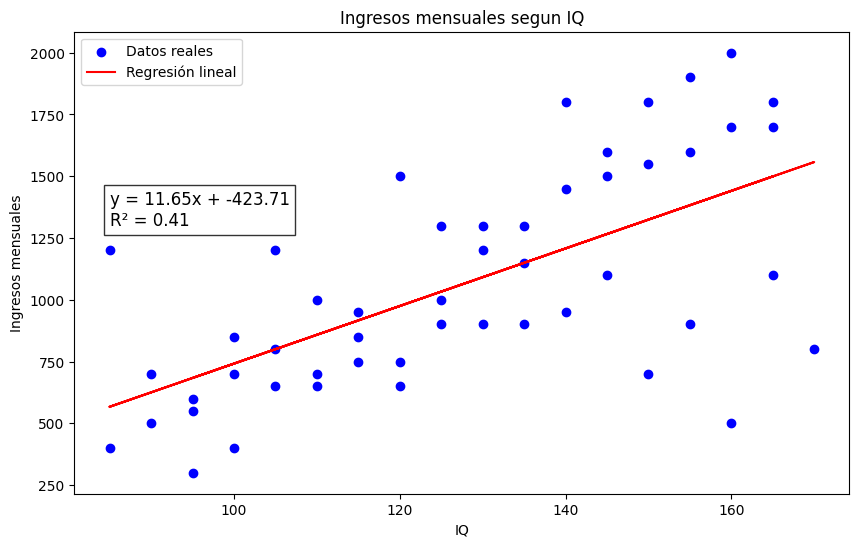

In [13]:
# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(x_iq, y_ingresos, color='blue', label='Datos reales')
plt.plot(x_iq, y_pred_ingresos, color='red', label='Regresión lineal')
plt.title('Ingresos mensuales segun IQ')
plt.xlabel('IQ')
plt.ylabel('Ingresos mensuales')
plt.legend()

# Mostrar ecuación en el gráfico
equation_text = f'y = {a_ingresos:.2f}x + {b_ingresos:.2f}\nR² = {r2_score(y_ingresos, y_pred_ingresos):.2f}'

# Ajustar las coordenadas para mostrar la ecuación en el gráfico
plt.text(x_iq.min(), y_ingresos.min() + 1000, equation_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.show()

In [8]:
# Evaluar el modelo
mae = mean_absolute_error(y_ingresos, y_pred_ingresos)
mse = mean_squared_error(y_ingresos, y_pred_ingresos)
r2 = r2_score(y_ingresos, y_pred_ingresos)

print(f"\nMétricas de evaluación:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


Métricas de evaluación:
MAE: 272.40
MSE: 115366.46
R²: 0.41


In [16]:
# Conclusiones sobre el resultado obtenido y aplicando su criterio profesional
print("\nConclusiones:")
print(f"El modelo de regresión lineal muestra una relación positiva entre el IQ y los ingresos mensuales.")
print(f"El valor R² de {r2:.2f} indica que aproximadamente el {r2*100:.2f}% de la variabilidad\nen los ingresos mensuales puede ser explicada por el IQ.")
print(f"El MAE de {mae:.2f} y el MSE de {mse:.2f} proporcionan una idea de la magnitud promedio\nde los errores de predicción.")
print("Es importante recordar que la correlación no implica causalidad. Aunque el IQ está\nrelacionado con los ingresos en este dataset, otros factores también influyen significativamente.")



Conclusiones:
El modelo de regresión lineal muestra una relación positiva entre el IQ y los ingresos mensuales.
El valor R² de 0.41 indica que aproximadamente el 41.00% de la variabilidad
en los ingresos mensuales puede ser explicada por el IQ.
El MAE de 272.40 y el MSE de 115366.46 proporcionan una idea de la magnitud promedio
de los errores de predicción.
Es importante recordar que la correlación no implica causalidad. Aunque el IQ está
relacionado con los ingresos en este dataset, otros factores también influyen significativamente.


In [17]:
# Leer un nuevo caso por teclado y hacer una predicción
try:
    nuevo_iq = float(input("\nIngrese el valor de IQ para predecir el ingreso mensual: "))
    nuevo_iq_reshaped = np.array([[nuevo_iq]])
    ingreso_predicho = modelo_ingresos.predict(nuevo_iq_reshaped)
    print(f"El ingreso mensual predicho para un IQ de {nuevo_iq} es: {ingreso_predicho[0]:.2f}")
except ValueError:
    print("Entrada inválida. Por favor, ingrese un número para el IQ.")


Ingrese el valor de IQ para predecir el ingreso mensual: 90
El ingreso mensual predicho para un IQ de 90.0 es: 625.14
